<a href="https://colab.research.google.com/github/DkaFreitas1501/TECH3/blob/main/TECH3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Tech Challenge 3

In [36]:
#conexao com bigquery
from google.colab import auth
auth.authenticate_user()

In [37]:
!pip install google-cloud-bigquery

In [38]:
from google.cloud import bigquery

In [39]:

from google.colab import data_table

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

CONECTANDO COM O PROJETO COVID19 TECH3

In [41]:
project= 'high-comfort-436916-g4'
location='US'
client = bigquery.Client(project = project, location = location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [42]:
#query - entrevistados por gênero
job = client.get_job('bquxjob_52ebb846_192457f4192')
participantes_sexo = job.to_dataframe()
participantes_sexo

,ANO,MES,Sexo,qtd_populacao_entrevistada
0,2020,5,Homem,167712
1,2020,5,Mulher,181594
2,2020,6,Homem,183091
3,2020,6,Mulher,198179
4,2020,7,Homem,184440
5,2020,7,Mulher,199726


    ANO  MES    Sexo  qtd_populacao_entrevistada
0  2020    5   Homem                      167712
1  2020    5  Mulher                      181594
2  2020    6   Homem                      183091
3  2020    6  Mulher                      198179
4  2020    7   Homem                      184440


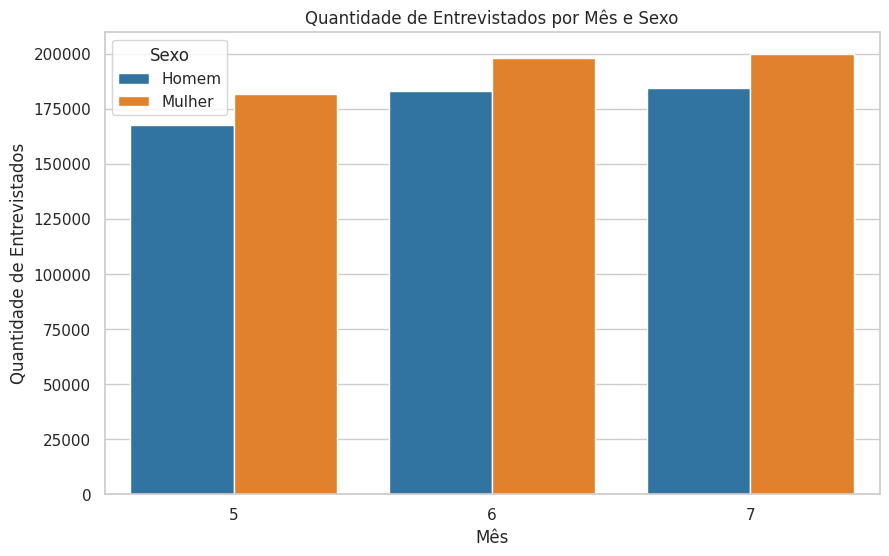

In [43]:


df_participantes_sexo = participantes_sexo

print(df_participantes_sexo.head())

# grafico de barras agrupado por mês e sexo
plt.figure(figsize=(10, 6))
sns.barplot(x='MES', y='qtd_populacao_entrevistada', hue='Sexo', data=df_participantes_sexo, palette={'Homem': '#1f77b4', 'Mulher': '#ff7f0e'})

plt.xlabel('Mês')  # Rótulo do eixo X
plt.ylabel('Quantidade de Entrevistados')  # Rótulo do eixo Y
plt.title('Quantidade de Entrevistados por Mês e Sexo')  # Título do gráfico

plt.show()


In [44]:
#query - entrevistados por situação economica
job = client.get_job('bquxjob_28c438fd_19245837f67')
participantes_emprego = job.to_dataframe()
participantes_emprego

,ANO,MES,Sexo,qtd_populacao_entrevistada,trabalhando,nao_trabalhando,Nao_respondido,mais_de_um_emprego,trabalhando_percentual,nao_trabalhando_percentual,Nao_respondido_percentual,mais_de_um_emprego_percentual
0,2020,5,Homem,167712,65572,70778,31362,6451,39.10,42.20,18.70,3.85
1,2020,5,Mulher,181594,44638,106829,30127,4662,24.58,58.83,16.59,2.57
2,2020,6,Homem,183091,73996,74798,34297,5672,40.41,40.85,18.73,3.10
3,2020,6,Mulher,198179,50482,114825,32872,4240,25.47,57.94,16.59,2.14
4,2020,7,Homem,184440,77519,72352,34569,5221,42.03,39.23,18.74,2.83
5,2020,7,Mulher,199726,52312,114288,33126,3890,26.19,57.22,16.59,1.95


    ANO  MES    Sexo  qtd_populacao_entrevistada  trabalhando  \
0  2020    5   Homem                      167712        65572   
1  2020    5  Mulher                      181594        44638   
2  2020    6   Homem                      183091        73996   
3  2020    6  Mulher                      198179        50482   
4  2020    7   Homem                      184440        77519   

   nao_trabalhando  Nao_respondido  mais_de_um_emprego  \
0            70778           31362                6451   
1           106829           30127                4662   
2            74798           34297                5672   
3           114825           32872                4240   
4            72352           34569                5221   

   trabalhando_percentual  nao_trabalhando_percentual  \
0                   39.10                       42.20   
1                   24.58                       58.83   
2                   40.41                       40.85   
3                   25.47       

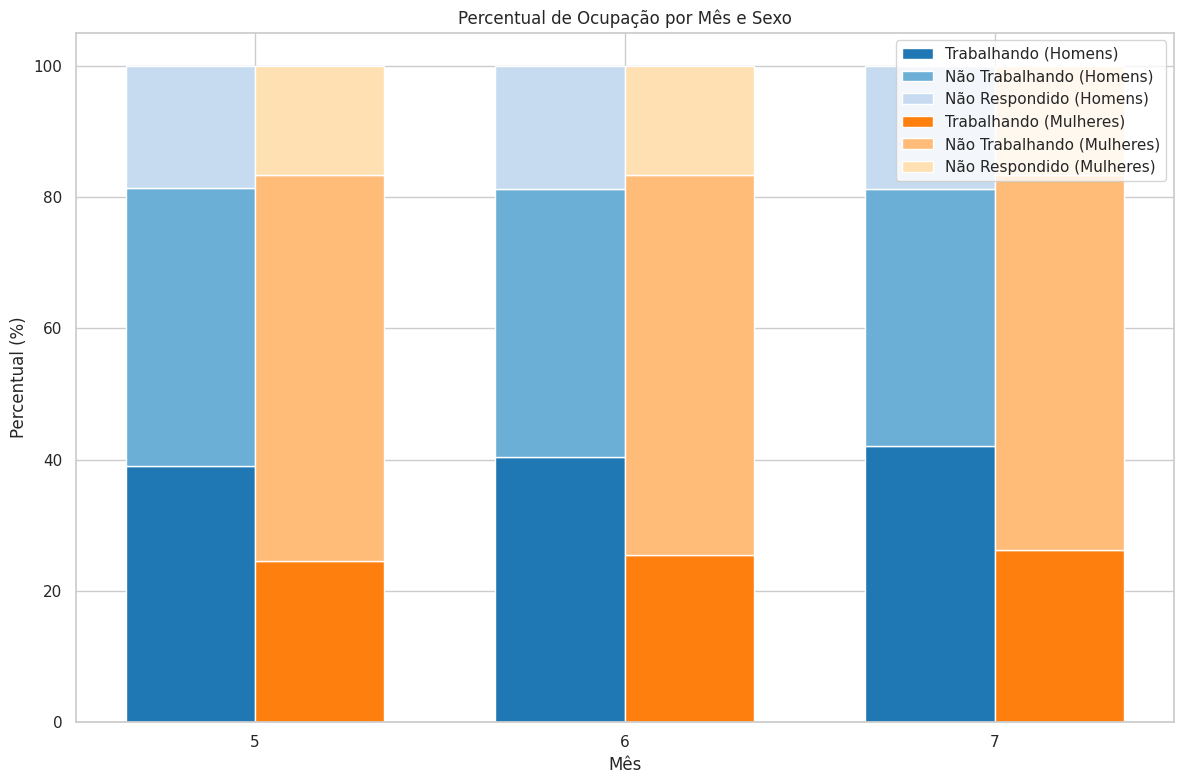

In [45]:

df_participantes_emprego = participantes_emprego

plt.figure(figsize=(12, 8))

largura_barra = 0.35

meses = df_participantes_emprego['MES'].unique()
indices = range(len(meses))  # Posições para as barras

# dados por sexo
homens = df_participantes_emprego[df_participantes_emprego['Sexo'] == 'Homem']
mulheres = df_participantes_emprego[df_participantes_emprego['Sexo'] == 'Mulher']

# barras empilhadas para homens (azul degradê)
plt.bar(
    [i - largura_barra/2 for i in indices],  # Colocar a barra dos homens um pouco à esquerda
    homens['trabalhando_percentual'],
    width=largura_barra,
    label='Trabalhando (Homens)',
    color='#1f77b4'  # Azul escuro para "Trabalhando" (Homens)
)
plt.bar(
    [i - largura_barra/2 for i in indices],
    homens['nao_trabalhando_percentual'],
    bottom=homens['trabalhando_percentual'],  # Empilhar sobre a parte "Trabalhando"
    width=largura_barra,
    label='Não Trabalhando (Homens)',
    color='#6baed6'  # Azul médio para "Não Trabalhando" (Homens)
)
plt.bar(
    [i - largura_barra/2 for i in indices],
    homens['Nao_respondido_percentual'],
    bottom=homens['trabalhando_percentual'] + homens['nao_trabalhando_percentual'],  # Empilhar sobre as anteriores
    width=largura_barra,
    label='Não Respondido (Homens)',
    color='#c6dbef'  # Azul claro para "Não Respondido" (Homens)
)

#  barras empilhadas para mulheres (laranja degradê)
plt.bar(
    [i + largura_barra/2 for i in indices],  # Colocar a barra das mulheres um pouco à direita
    mulheres['trabalhando_percentual'],
    width=largura_barra,
    label='Trabalhando (Mulheres)',
    color='#ff7f0e'  # Laranja escuro para "Trabalhando" (Mulheres)
)
plt.bar(
    [i + largura_barra/2 for i in indices],  # Posição das barras de mulheres
    mulheres['nao_trabalhando_percentual'],
    bottom=mulheres['trabalhando_percentual'],  # Empilhar sobre a parte "Trabalhando"
    width=largura_barra,
    label='Não Trabalhando (Mulheres)',
    color='#ffbb78'  # Laranja médio para "Não Trabalhando" (Mulheres)
)
plt.bar(
    [i + largura_barra/2 for i in indices],  # Posição das barras de mulheres
    mulheres['Nao_respondido_percentual'],
    bottom=mulheres['trabalhando_percentual'] + mulheres['nao_trabalhando_percentual'],  # Empilhar sobre as anteriores
    width=largura_barra,
    label='Não Respondido (Mulheres)',
    color='#ffe0b2'  # Laranja claro para "Não Respondido" (Mulheres)
)

# rótulos do eixo X e título
plt.xlabel('Mês')
plt.ylabel('Percentual (%)')
plt.title('Percentual de Ocupação por Mês e Sexo')

# etiquetas do eixo x para cada mês
plt.xticks(ticks=indices, labels=meses)

# legenda
plt.legend(loc='upper right')


plt.tight_layout()
plt.show()


In [46]:
#query - entrevistados por ocupação"
job = client.get_job('bquxjob_77987dac_19245811465')
emprego_ocupacao = job.to_dataframe()
emprego_ocupacao

,cargo,qtd_populacao_entrevistada
0,"Agricultor, criador de animais, pescador, silv...",45844
1,"Pedreiro, servente de pedreiro, pintor, eletri...",28038
2,"Empregado doméstico, diarista, cozinheiro",22776
3,Outra profissão de nível superior,21046
4,"Professor da educação infantil, de ensino fund...",18549
5,"Auxiliar de escritório, escriturário",15204
6,Outro técnico ou profissional de nível médio,14881
7,"Faxineiro, auxiliar de limpeza etc.",12922
8,"Diretor, gerente, cargo político ou comissionado",12764
9,Auxiliar da agropecuária,11119


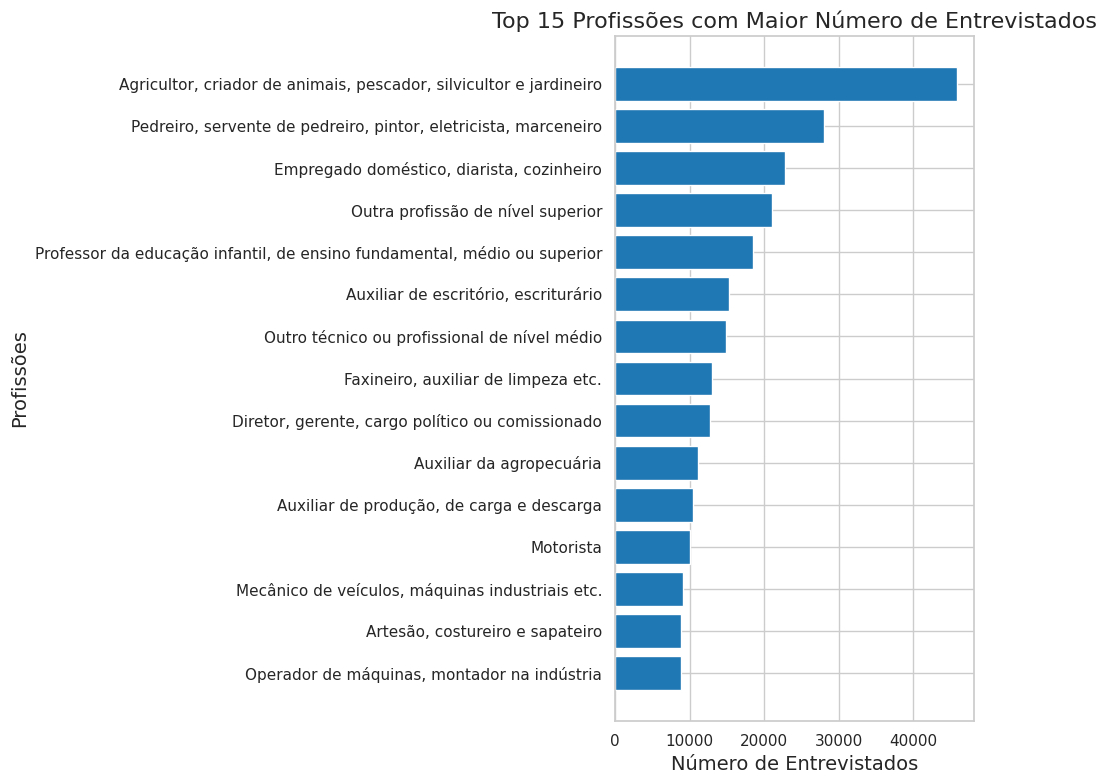

In [47]:
# Ordenar o DataFrame 'df_emprego_ocupacao' pelo número de entrevistados (qtd_populacao_entrevistada) em ordem decrescente
# E pegar apenas as 15 profissões com maior número de entrevistados
df_top15 = emprego_ocupacao.nlargest(15, 'qtd_populacao_entrevistada')

# gráfico de barras horizontais
plt.figure(figsize=(10, 8))

# gráfico de barras horizontais, ordenado pelo número de entrevistados
plt.barh(df_top15['cargo'], df_top15['qtd_populacao_entrevistada'], color='#1f77b4')

# título e rótulos
plt.title('Top 15 Profissões com Maior Número de Entrevistados', fontsize=16)
plt.xlabel('Número de Entrevistados', fontsize=14)
plt.ylabel('Profissões', fontsize=14)

# Inverter a ordem para ficar decrescente
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [48]:
#query - entrevistados e plano de saude"
job = client.get_job('bquxjob_70cc19e7_19245878a13')
plano_de_saude = job.to_dataframe()
plano_de_saude

,ANO,MES,com_plano_saude,sem_plano_saude,total,percentual_com_plano_saude,percentual_sem_plano_saude
0,2020,5,88501,260072,348573,25.389517,74.610483
1,2020,6,87921,290886,378807,23.209972,76.790028
2,2020,7,86877,295320,382197,22.730948,77.269052


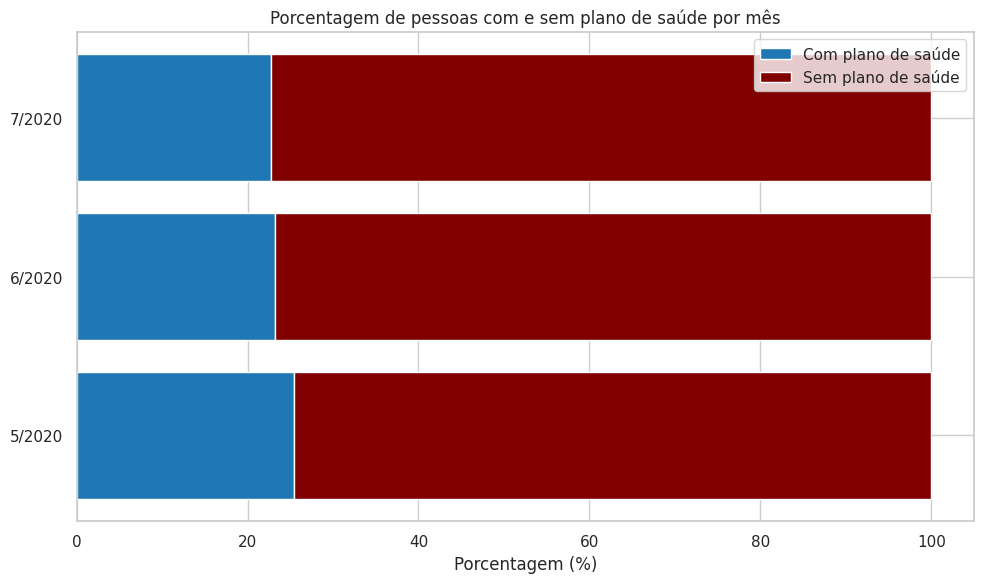

In [49]:
# gráfico de barras horizontais
def plot_porcentagem_plano_saude(plano_de_saude):
    # Criar uma coluna de rótulos de mês/ano
    meses = plano_de_saude['MES'].astype(str) + '/' + plano_de_saude['ANO'].astype(str)

    fig, ax = plt.subplots(figsize=(10, 6))

    # barras horizontais para cada grupo (com plano e sem plano)
    ax.barh(meses, plano_de_saude['percentual_com_plano_saude'], color='#1f77b4', label='Com plano de saúde')
    ax.barh(meses, plano_de_saude['percentual_sem_plano_saude'],
            left=plano_de_saude['percentual_com_plano_saude'], color='maroon', label='Sem plano de saúde')

    # rótulos e título
    ax.set_xlabel('Porcentagem (%)')
    ax.set_title('Porcentagem de pessoas com e sem plano de saúde por mês')

    # legenda
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_porcentagem_plano_saude(plano_de_saude)



Caracterização dos Sintomas Clínicos

In [50]:
#sintomas
#query - sintomas"
job = client.get_job('bquxjob_77487648_192459b1348')
sintomas_clinicos = job.to_dataframe()
sintomas_clinicos

,ANO,MES,qtd_populacao_entrevistada,qtd_populacao_internada,perc_populacao_internada,qtd_populacao_nao_internada,Febre,Tosse,Dor_de_garganta,Dificuldade_para_respirar,...,Posto_de_saúde_outros_percent,PS_SUS_UPA_percent,Hospital_SUS_percent,Ambulatório_forcas_armadas_percent,PS_forcas_armadas_percent,Hospital_forcas_armadas_percent,qtd_populacao_nao_atendida,qtd_populacao_nao_atendida_percent,qtd_sedado_intubado_ventilador,qtd_sedado_intubado_ventilador_percent
0,2020,5,38166,6032,15.80,32119,8448,12099,8994,5081,...,7.61,3.59,3.02,1.51,0.59,1.70,36,0.09,50,0.13
1,2020,6,28280,5715,20.21,22557,6545,8973,7018,3735,...,10.25,4.13,4.38,1.96,0.54,1.79,35,0.12,62,0.22
2,2020,7,25433,5761,22.65,19661,5832,8482,6757,3042,...,11.30,4.55,4.24,1.96,0.76,2.30,58,0.23,68,0.27


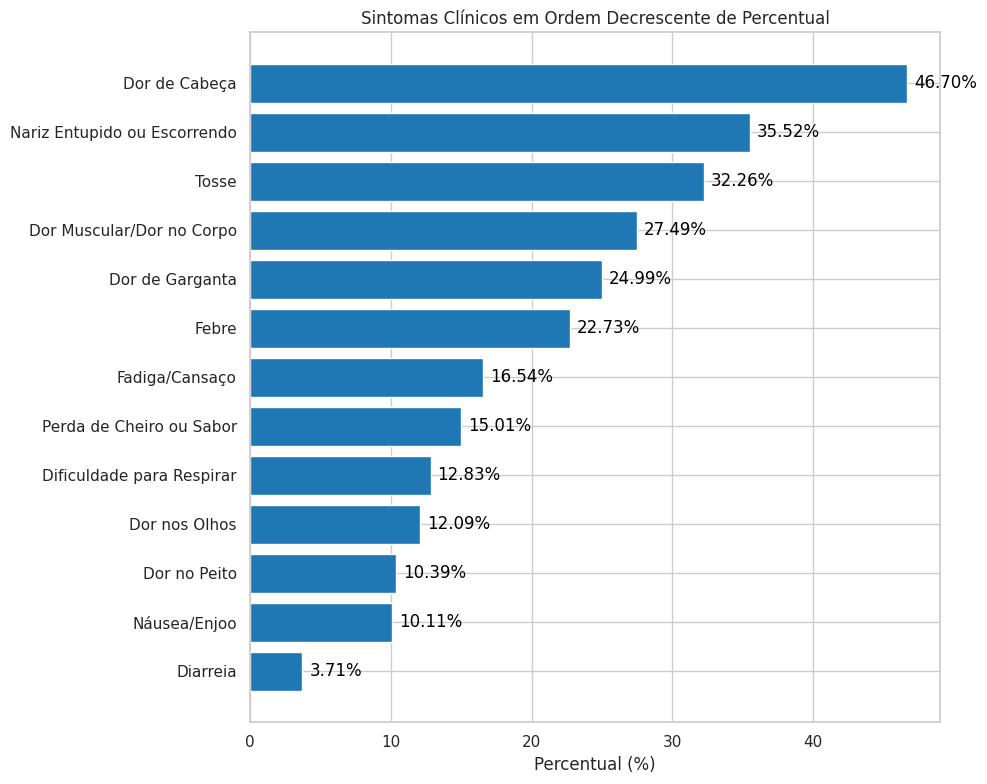

In [51]:

sintomas_percentuais = {
    'Febre': sintomas_clinicos['Febre_percentual'].mean(),
    'Tosse': sintomas_clinicos['Tosse_percentual'].mean(),
    'Dor de Garganta': sintomas_clinicos['Dor_de_garganta_percentual'].mean(),
    'Dificuldade para Respirar': sintomas_clinicos['Dificuldade_para_respirar_percentual'].mean(),
    'Dor de Cabeça': sintomas_clinicos['Dor_de_cabeça_percentual'].mean(),
    'Dor no Peito': sintomas_clinicos['Dor_no_peito_percentual'].mean(),
    'Náusea/Enjoo': sintomas_clinicos['Náusea_enjoo_percentual'].mean(),
    'Nariz Entupido ou Escorrendo': sintomas_clinicos['Nariz_entupido_ou_escorrendo_percentual'].mean(),
    'Fadiga/Cansaço': sintomas_clinicos['Fadiga_cansaço_percentual'].mean(),
    'Dor nos Olhos': sintomas_clinicos['Dor_nos_olhos_percentual'].mean(),
    'Perda de Cheiro ou Sabor': sintomas_clinicos['Perda_de_cheiro_ou_de_sabor_percentual'].mean(),
    'Dor Muscular/Dor no Corpo': sintomas_clinicos['Dor_muscular_dor_no_corpo_percentual'].mean(),
    'Diarreia': sintomas_clinicos['Diarreia_percentual'].mean()
}


df_sintomas = pd.DataFrame(list(sintomas_percentuais.items()), columns=['Sintoma', 'Percentual'])

# Ordenando os sintomas por percentual de forma decrescente
df_sintomas = df_sintomas.sort_values(by='Percentual', ascending=False)

# Gerando o gráfico de barras horizontais
plt.figure(figsize=(10, 8))
bars = plt.barh(df_sintomas['Sintoma'], df_sintomas['Percentual'], color='#1f77b4')

# Adicionando os rótulos nas barras
for bar in bars:
    width = bar.get_width()  # Pega o valor da barra (percentual)
    plt.text(width + 0.5,    # Posição X: ligeiramente à direita da barra
             bar.get_y() + bar.get_height()/2,  # Posição Y: meio da barra
             f'{width:.2f}%',  # Formato do rótulo com duas casas decimais
             va='center', color='black')

# Personalização dos eixos e título
plt.xlabel('Percentual (%)')
plt.title('Sintomas Clínicos em Ordem Decrescente de Percentual')
plt.gca().invert_yaxis()  # Inverte a ordem dos sintomas para decrescente
plt.tight_layout()  # Ajusta layout para evitar cortes de rótulos
plt.show()


In [52]:
#query - internacao"
job = client.get_job('bquxjob_535955c4_19245bbbffc')
internacao = job.to_dataframe()
internacao

,ANO,Sexo,qtd_populacao_entrevistada,qtd_populacao_internada,perc_populacao_internada,qtd_populacao_nao_internada
0,2020,Homem,535243,7347,1.37,31070
1,2020,Mulher,579499,10161,1.75,43267


<ipython-input-53-843a1fb9f1ec>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sexo', y='perc_populacao_internada', data=internacao,  palette={'Homem': '#1f77b4', 'Mulher': '#ff7f0e'})


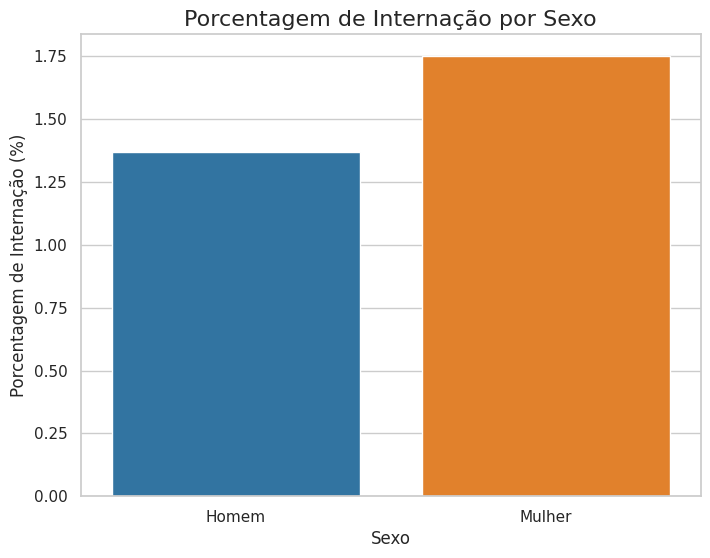

In [53]:


# gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Sexo', y='perc_populacao_internada', data=internacao,  palette={'Homem': '#1f77b4', 'Mulher': '#ff7f0e'})

# título e rótulos aos eixos
plt.title('Porcentagem de Internação por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Porcentagem de Internação (%)', fontsize=12)

plt.show()


In [54]:
#query - sintomas_sexo"
job = client.get_job('bquxjob_73f83643_19245ceace5')
sintomas_sexo = job.to_dataframe()
sintomas_sexo

,ANO,Sexo,qtd_populacao_entrevistada,Febre,Tosse,Dor_de_garganta,Dificuldade_para_respirar,Dor_de_cabeça,Dor_no_peito,Náusea_enjoo,...,Dificuldade_para_respirar_percentual,Dor_de_cabeça_percentual,Dor_no_peito_percentual,Náusea_enjoo_percentual,Nariz_entupido_ou_escorrendo_percentual,Fadiga_cansaço_percentual,Dor_nos_olhos_percentual,Perda_de_cheiro_ou_de_sabor_percentual,Dor_muscular_dor_no_corpo_percentual,Diarreia_percentual
0,2020,Homem,535243,9672,13432,9023,4732,15646,3981,3210,...,0.88,2.92,0.74,0.60,2.72,1.11,0.80,1.04,1.92,0.22
1,2020,Mulher,579499,11153,16122,13746,7126,27290,5642,6074,...,1.23,4.71,0.97,1.05,3.11,1.57,1.19,1.44,2.60,0.29


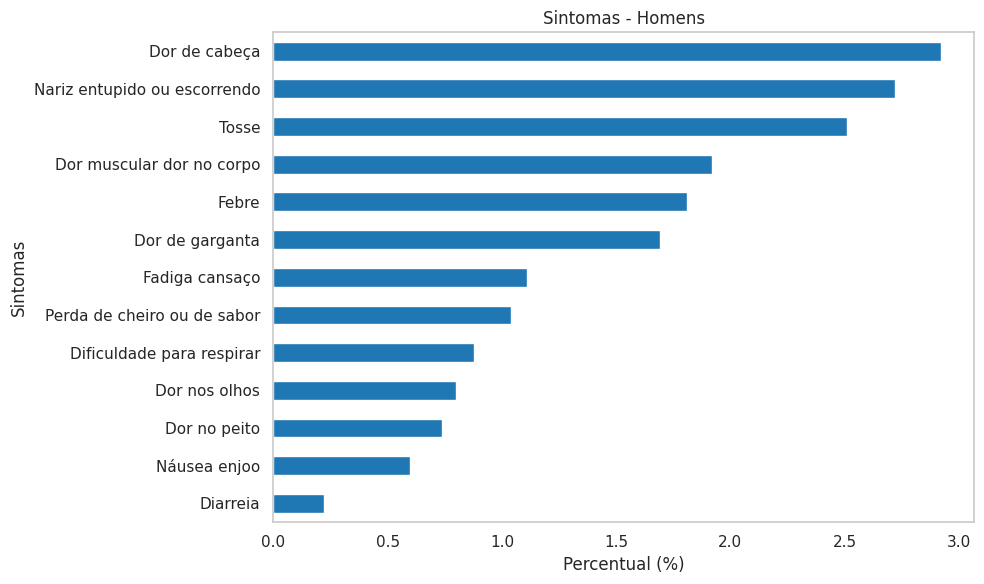

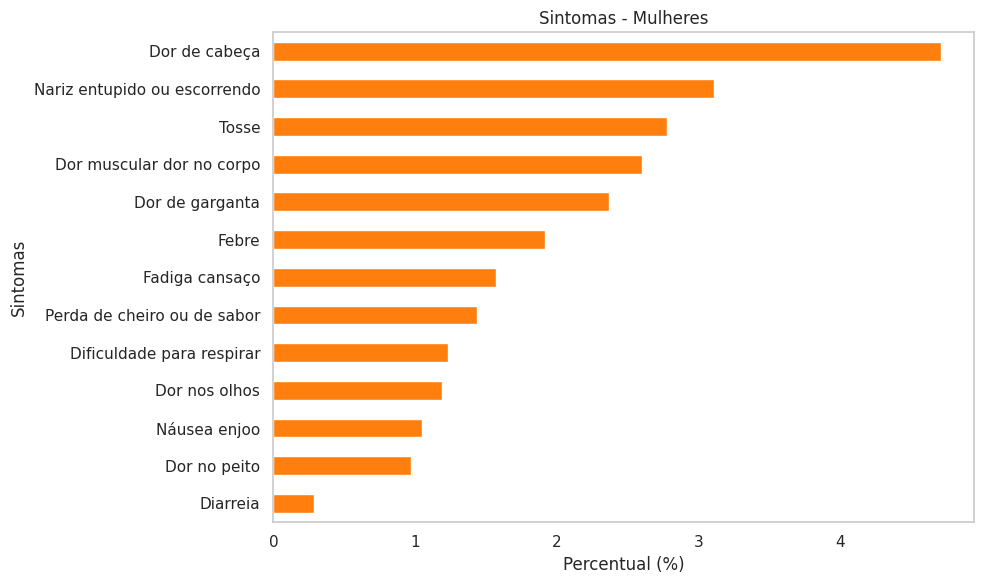

In [55]:
df_sintomas_sexo = sintomas_sexo

# Filtrar os dados para homens e mulheres
df_homem = df_sintomas_sexo[df_sintomas_sexo['Sexo'] == 'Homem']
df_mulher = df_sintomas_sexo[df_sintomas_sexo['Sexo'] == 'Mulher']

# Selecionar as colunas de sintomas percentuais
sintomas_percentual_cols = [col for col in df_sintomas_sexo.columns if 'percentual' in col]

# Criar um dicionário para renomear as colunas, removendo "percentual" e substituindo "_" por espaços
rename_dict = {col: col.replace('_percentual', '').replace('_', ' ') for col in sintomas_percentual_cols}

# Criar gráficos de barras horizontais decrescentes para Homens
plt.figure(figsize=(10, 6))
df_homem_sintomas = df_homem[sintomas_percentual_cols].mean().sort_values(ascending=False)
df_homem_sintomas.index = df_homem_sintomas.index.map(rename_dict)  # Renomear os rótulos
ax = df_homem_sintomas.plot(kind='barh', color='#1f77b4')  # Barras horizontais, azul para Homens
plt.title('Sintomas - Homens')
plt.xlabel('Percentual (%)')
plt.ylabel('Sintomas')
plt.gca().invert_yaxis()  # Inverte a ordem para que o maior valor fique no topo
ax.grid(False)  # Remover as linhas de grade
plt.tight_layout()
plt.show()

# gráficos de barras horizontais decrescentes para Mulheres
plt.figure(figsize=(10, 6))
df_mulher_sintomas = df_mulher[sintomas_percentual_cols].mean().sort_values(ascending=False)
df_mulher_sintomas.index = df_mulher_sintomas.index.map(rename_dict)  # Renomear os rótulos
ax = df_mulher_sintomas.plot(kind='barh', color='#ff7f0e')  # Barras horizontais, laranja para Mulheres
plt.title('Sintomas - Mulheres')
plt.xlabel('Percentual (%)')
plt.ylabel('Sintomas')
plt.gca().invert_yaxis()  # Inverte a ordem para que o maior valor fique no topo
ax.grid(False)  # Remover as linhas de grade
plt.tight_layout()
plt.show()




In [56]:
#query - sintomas_sexo"
job = client.get_job('bquxjob_22c748da_19245e441f9')
internacao_intubacao = job.to_dataframe()
internacao_intubacao

,ANO,Sexo,qtd_populacao_entrevistada,qtd_populacao_internada,perc_populacao_internada,qtd_populacao_nao_internada,qtd_sedado_intubado_ventilador,qtd_sedado_intubado_ventilador_percent
0,2020,Homem,535243,7347,1.37,31070,106,0.02
1,2020,Mulher,579499,10161,1.75,43267,74,0.01


<ipython-input-57-d67f48c651b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sexo', y='qtd_sedado_intubado_ventilador_percent', data=internacao_intubacao, palette={'Homem': '#1f77b4', 'Mulher': '#ff7f0e'})


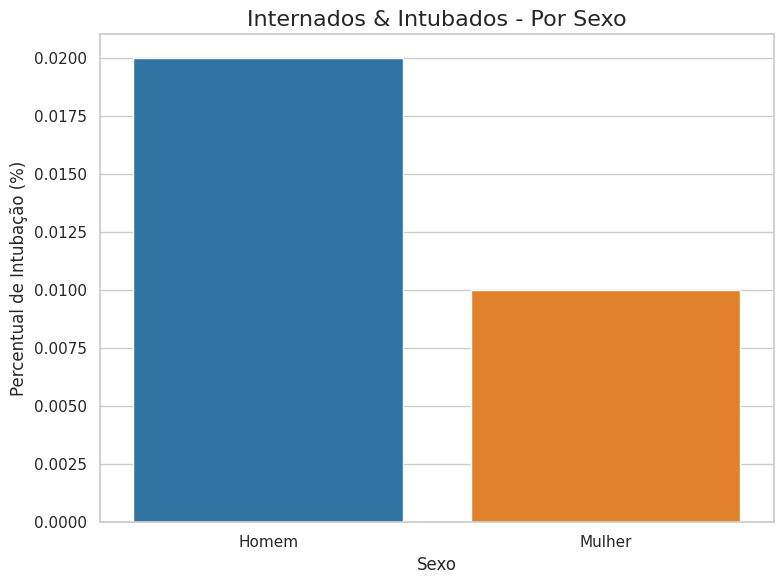

In [57]:

# gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Sexo', y='qtd_sedado_intubado_ventilador_percent', data=internacao_intubacao, palette={'Homem': '#1f77b4', 'Mulher': '#ff7f0e'})

# rótulos e título ao gráfico
plt.title('Internados & Intubados - Por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Percentual de Intubação (%)', fontsize=12)

plt.tight_layout()
plt.show()


In [58]:
# query - atendimento_tipo"
job = client.get_job('bquxjob_7689710e_192461b4f85')
atendimento_tipo = job.to_dataframe()
atendimento_tipo

,ANO,qtd_populacao_entrevistada,Posto_de_saúde_outros,PS_SUS_UPA,Hospital_SUS,Ambulatório_forcas_armadas,PS_forcas_armadas,Hospital_forcas_armadas,Posto_de_saúde_outros_percent,PS_SUS_UPA_percent,Hospital_SUS_percent,Ambulatório_forcas_armadas_percent,PS_forcas_armadas_percent,Hospital_forcas_armadas_percent
0,2020,1114742,8677,3696,3471,1630,570,1740,0.78,0.33,0.31,0.15,0.05,0.16


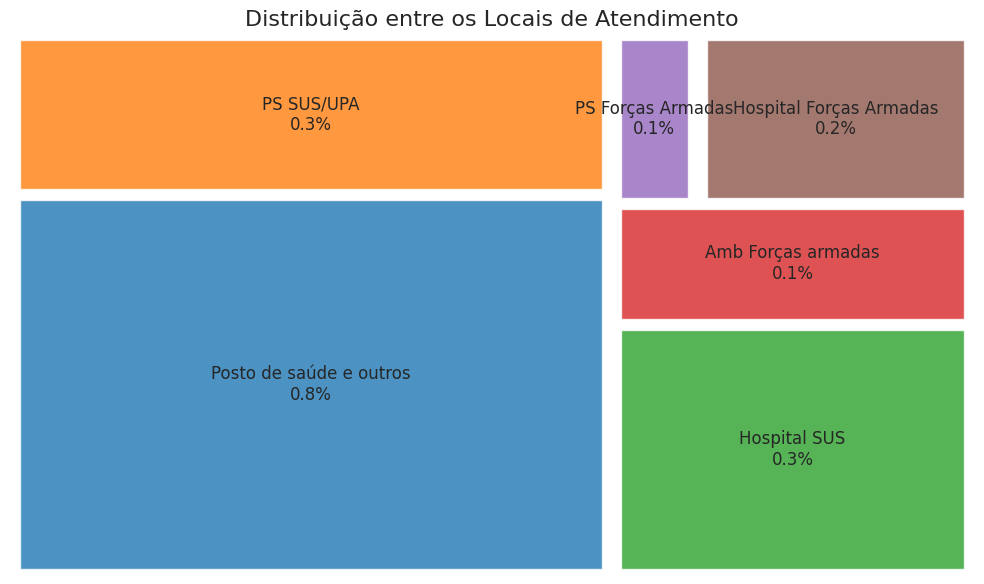

In [59]:
!pip install squarify
import squarify

# Colunas de percentuais
tipos_de_atendimento = ['Posto_de_saúde_outros_percent', 'PS_SUS_UPA_percent', 'Hospital_SUS_percent',
                        'Ambulatório_forcas_armadas_percent', 'PS_forcas_armadas_percent', 'Hospital_forcas_armadas_percent']

# Labels para o gráfico
labels = ['Posto de saúde e outros', 'PS SUS/UPA', 'Hospital SUS',
          'Amb Forças armadas', 'PS Forças Armadas', 'Hospital Forças Armadas']

# Extração dos valores dos percentuais do DataFrame
valores = atendimento_tipo[tipos_de_atendimento].iloc[0].values  # Pegando os valores da primeira linha

# Criar os labels com valores para o gráfico
label_values = [f'{label}\n{value:.1f}%' for label, value in zip(labels, valores)]

# Definir as cores para o treemap
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Paleta de cores

# gráfico de treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=valores, label=label_values, color=colors, alpha=0.8, pad=True)

# título
plt.title('Distribuição entre os Locais de Atendimento', fontsize=16)

# Remover os eixos
plt.axis('off')

plt.tight_layout()
plt.show()



In [65]:
# query - comportamento"
job = client.get_job('bquxjob_9eee8c_19247f634c3')
comportamento_populacao = job.to_dataframe()
comportamento_populacao

,ANO,Sexo,Nao_fez_restricao,Reduziu_contato,Ficou_em_casa_necessidade,Ficou_rigorosamente_isolado
0,2020,Homem,33248,405603,336159,141063
1,2020,Mulher,27912,323674,461314,181313


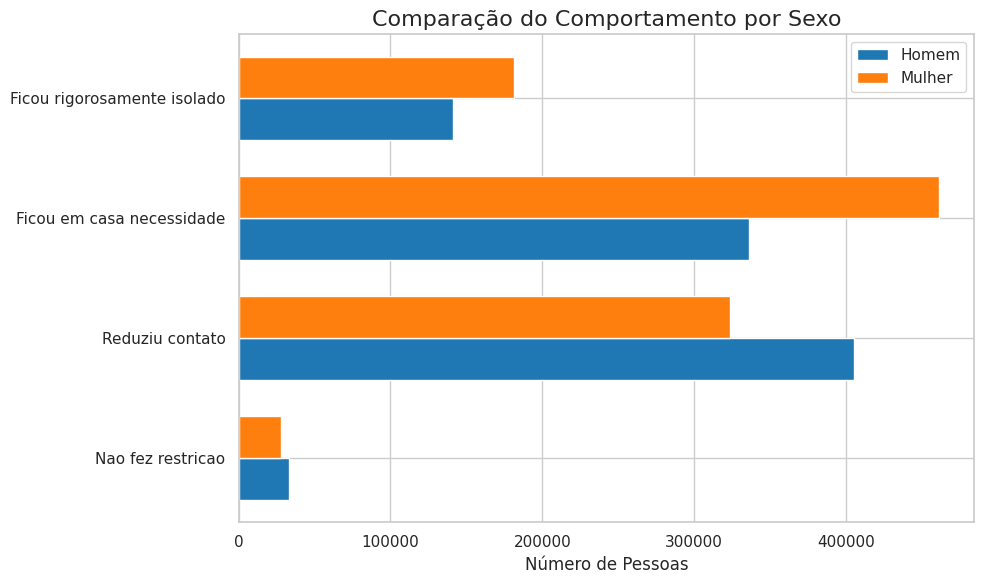

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# comportamentos e sexo no eixo X
comportamentos = ['Nao_fez_restricao', 'Reduziu_contato', 'Ficou_em_casa_necessidade', 'Ficou_rigorosamente_isolado']

# Separar os dados para homens e mulheres
df_homem = comportamento_populacao[comportamento_populacao['Sexo'] == 'Homem']
df_mulher = comportamento_populacao[comportamento_populacao['Sexo'] == 'Mulher']

# Definir o número de comportamentos
n_comportamentos = len(comportamentos)
indice = np.arange(n_comportamentos)

# Tamanho da barra para cada sexo
bar_width = 0.35

# gráfico de barras horizontais lado a lado
plt.figure(figsize=(10, 6))
plt.barh(indice, df_homem[comportamentos].values[0], bar_width, label='Homem', color='#1f77b4')  # Azul para homens
plt.barh(indice + bar_width, df_mulher[comportamentos].values[0], bar_width, label='Mulher', color='#ff7f0e')  # Laranja para mulheres

# Remover os (_) das legendas dos comportamentos
comportamentos_legenda = [label.replace('_', ' ') for label in comportamentos]

# Adicionar rótulos, título e ajustes no gráfico
plt.xlabel('Número de Pessoas', fontsize=12)
plt.title('Comparação do Comportamento por Sexo', fontsize=16)
plt.yticks(indice + bar_width / 2, comportamentos_legenda, rotation=0)  # Ajuste dos rótulos no eixo Y sem os underscores


plt.legend()

plt.tight_layout()
plt.show()


In [69]:
# query - comportamento"
job = client.get_job('bquxjob_5cb9de35_192480f8b85')
testecovid_populacao = job.to_dataframe()
testecovid_populacao

,ANO,Sexo,Testes_Positivos,Testes_Negativos,Testes_Inconclusivo,Testes_nao_recebeu_ainda
0,2020,Homem,628,1393,33,44
1,2020,Mulher,705,1406,23,53


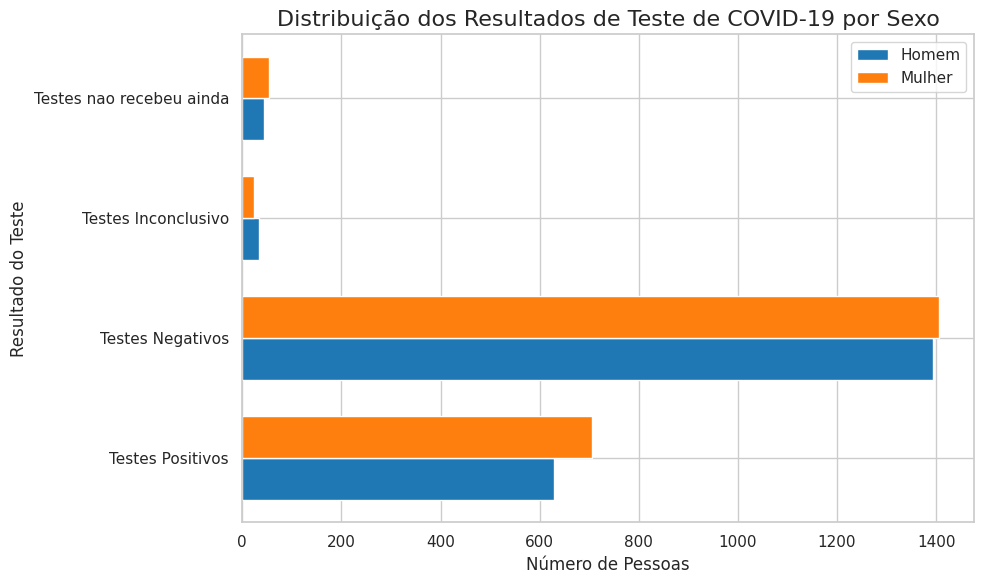

In [70]:

# resultados dos testes no eixo X
resultados_testes = ['Testes_Positivos', 'Testes_Negativos', 'Testes_Inconclusivo', 'Testes_nao_recebeu_ainda']

# Separar os dados para homens e mulheres
df_homem = testecovid_populacao[testecovid_populacao['Sexo'] == 'Homem']
df_mulher = testecovid_populacao[testecovid_populacao['Sexo'] == 'Mulher']

# Definir o número de resultados dos testes
n_resultados = len(resultados_testes)
indice = np.arange(n_resultados)

# Tamanho da barra para cada sexo
bar_width = 0.35

# gráfico de barras horizontais lado a lado
plt.figure(figsize=(10, 6))
plt.barh(indice, df_homem[resultados_testes].values[0], bar_width, label='Homem', color='#1f77b4')  # Azul para homens
plt.barh(indice + bar_width, df_mulher[resultados_testes].values[0], bar_width, label='Mulher', color='#ff7f0e')  # Laranja para mulheres

# Remover os underscores das legendas
resultados_legenda = [label.replace('_', ' ') for label in resultados_testes]

# rótulos, título e ajustes no gráfico
plt.xlabel('Número de Pessoas', fontsize=12)
plt.ylabel('Resultado do Teste', fontsize=12)
plt.title('Distribuição dos Resultados de Teste de COVID-19 por Sexo', fontsize=16)
plt.yticks(indice + bar_width / 2, resultados_legenda, rotation=0)  # Ajustar os rótulos no eixo Y sem underscores

plt.legend()
plt.tight_layout()
plt.show()
